# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [15]:
# Initial imports
import pandas as pd
from newsapi.newsapi_client import NewsApiClient
import nltk
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')

%matplotlib inline


[nltk_data] Downloading package vader_lexicon to C:\Users\Nadir
[nltk_data]     Qureshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Read your api key environment variable
api_key = "4a32849c43d24fe78d6172b8b1121e16"


In [17]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [18]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles


{'status': 'ok',
 'totalResults': 8355,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
   'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
   'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
   'publishedAt': '2021-11-05T13:32:14Z',
   'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\

In [6]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
eth_articles

{'status': 'ok',
 'totalResults': 3232,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Mitchell Clark',
   'title': 'The NFT Bay asks if you would steal all the JPEGs',
   'description': 'The NFT Bay is an incredible piece of performance art that promises to let you download all the NFTs on the Ethereum blockchain. The torrent contains nearly 20TB worth of files, and works as a commentary on collecting and owning.',
   'url': 'https://www.theverge.com/2021/11/18/22790131/nft-bay-pirating-digital-ownership-piracy-crypto-art-right-click',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/UMHdxnP0BlxxYxbIu9Ea5K1QwGk=/0x0:2028x1062/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23025815/Screen_Shot_2021_11_18_at_14.21.58.png',
   'publishedAt': '2021-11-19T02:01:07Z',
   'content': 'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley ha

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments, )
bitcoin_df.head()

,text,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
2,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
3,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847
4,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.000,0.864


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()


,text,compound,positive,negative,neutral
0,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784
1,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847
2,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.154845,0.051100,0.015550,0.93330
std,0.329002,0.060732,0.039944,0.06378
min,-0.680800,0.000000,0.000000,0.83300
25%,0.000000,0.000000,0.000000,0.88125
50%,0.000000,0.000000,0.000000,0.93100
75%,0.420600,0.110500,0.000000,1.00000
max,0.571900,0.153000,0.167000,1.00000


In [112]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.0,20.000000
mean,0.280475,0.063150,0.0,0.936850
std,0.308037,0.074661,0.0,0.074661
min,0.000000,0.000000,0.0,0.779000
25%,0.000000,0.000000,0.0,0.902500
50%,0.180600,0.036000,0.0,0.964000
75%,0.530600,0.097500,0.0,1.000000
max,0.822500,0.221000,0.0,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum - 0.822500

Q. Which coin had the highest positive score?

A: Ethereum - 0.221000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    tokens = []


    for w in lem:
        if w not in sw:
            tokens.append(w)
    
    return tokens


In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df.head()


,text,compound,positive,negative,neutral,tokens
0,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[big, new, presence, slurping, power, u, grid,..."
2,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
4,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.000,0.864,"[posted, becoming, first, country, accept, cry..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df.head()


,text,compound,positive,negative,neutral,tokens
0,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784,"[claim, ownership, someone, probably, want, ta..."
1,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847,"[keeping, previous, announcement, amc, theater..."
2,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [118]:
from collections import Counter
from nltk import ngrams

In [119]:
# Generate the Bitcoin N-grams where N=2
string = ' '.join(bitcoin_df['text'])
processed = tokenizer(string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)


[(('reuters', 'bitcoin'), 6),
 (('illustration', 'taken'), 5),
 (('char', 'representation'), 4),
 (('cryptocurrency', 'bitcoin'), 4),
 (('representation', 'virtual'), 4),
 (('bitcoin', 'seen'), 4),
 (('picture', 'illustration'), 4),
 (('char', 'bitcoin'), 4),
 (('virtual', 'cryptocurrency'), 3),
 (('seen', 'picture'), 3)]

In [120]:
# Generate the Ethereum N-grams where N=2
string = ' '.join(ethereum_df['text'])
processed = tokenizer(string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)


[(('representation', 'cryptocurrencies'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'june'), 4),
 (('new', 'york'), 3),
 (('bitcoin', 'ethereum'), 3),
 (('ethereum', 'dogecoin'), 3),
 (('crosschain', 'bridge'), 2),
 (('ethereum', 'bitcoin'), 2),
 (('york', 'time'), 2),
 (('char', 'representation'), 2)]

In [121]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [122]:
# Use token_count to get the top 10 words for Bitcoin
text = ' '.join(bitcoin_df['text'])
processed = tokenizer(text)
token_count(processed)


[('bitcoin', 25),
 ('char', 19),
 ('reuters', 7),
 ('illustration', 6),
 ('taken', 6),
 ('2021', 6),
 ('new', 5),
 ('representation', 5),
 ('cryptocurrency', 5),
 ('picture', 5)]

In [123]:
# Use token_count to get the top 10 words for Ethereum
text = ' '.join(ethereum_df['text'])
processed = tokenizer(text)
token_count(processed)


[('char', 20),
 ('ethereum', 12),
 ('bitcoin', 9),
 ('cryptocurrency', 8),
 ('representation', 6),
 ('cryptocurrencies', 5),
 ('new', 4),
 ('york', 4),
 ('illustration', 4),
 ('taken', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

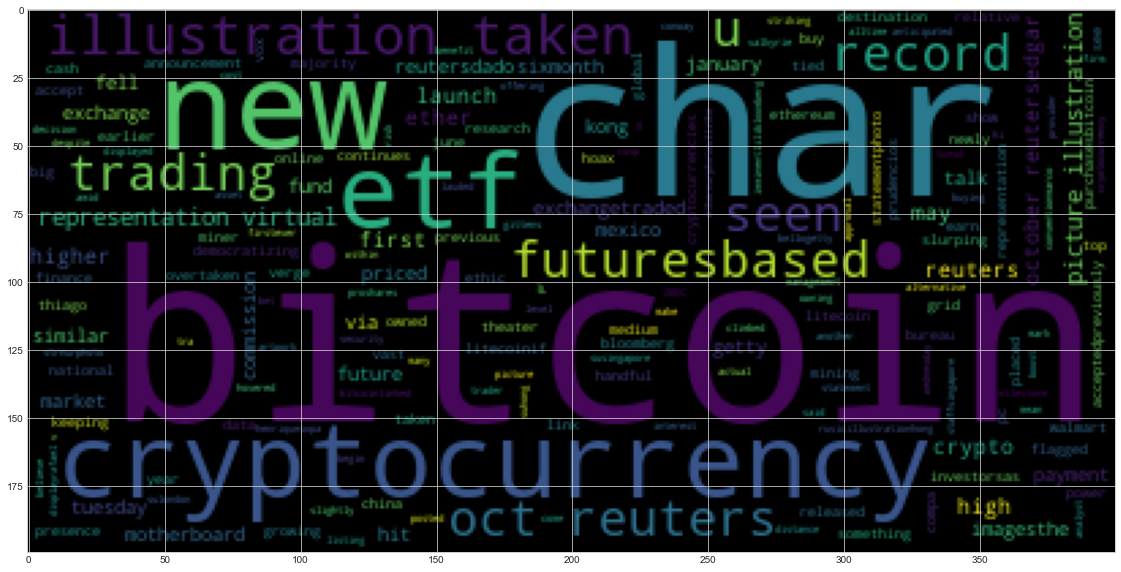

In [125]:
# Generate the Bitcoin word cloud
string = ' '.join(bitcoin_df['text'])
processed = tokenizer(string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)


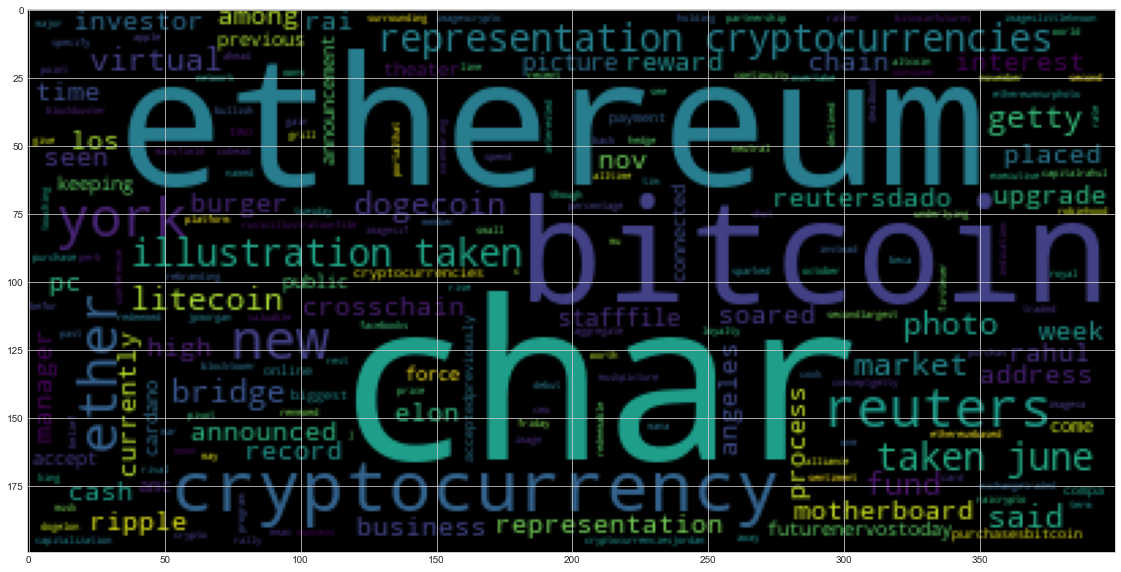

In [126]:
# Generate the Ethereum word cloud
string = ' '.join(ethereum_df['text'])
processed = tokenizer(string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [127]:
import spacy
from spacy import displacy

In [128]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

2021-11-17 19:58:41.679485: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-17 19:58:41.679876: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [129]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
btc_article = ' '.join(bitcoin_df['text'])
btc_article


In [131]:
# Run the NER processor on all of the text
doc = nlp(btc_article)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"


In [132]:
# Render the visualization
displacy.render(doc, style='ent')


In [133]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))


earlier this year DATE
Verge LAW
Vox Media ORG
Photo Illustration ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
Bloomberg ORG
the National Bureau ORG
AMC ORG
Bitcoin PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
IllustrationHONG KONG GPE
Oct 21 DATE
Reuters ORG
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Bitcoin PERSON
October 18, 2021 DATE
REUTERS ORG
Oct 19 DATE
Reuters ORG
six-month DATE
+2332 PERSON
Reuters ORG
SINGAPORE GPE
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
STR ORG
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares ORG
Bitcoin 2021 DATE
Marco Bello/ PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
ETF ORG
ETF ORG
NurPhoto ORG
ETF ORG
first ORDINAL
ETF ORG
Rafael Henrique/SOPA Images/LightRocket PERSON
Getty Images ORG
7% PERCENT
Monday DATE
morning

---

### Ethereum NER

In [134]:
# Concatenate all of the Ethereum text together
eth_article = ' '.join(ethereum_df['text'])
eth_article


'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars] Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars] Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin ma

In [135]:
# Run the NER processor on all of the text
doc = nlp(eth_article)

# Add a title to the document\
doc.user_data["title"] = "Ethereum NER"


In [136]:
# Render the visualization
displacy.render(doc, style='ent')


In [137]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))


Cardano PERSON
Nervos  DATE
today DATE
the Force Bridge FAC
AMC ORG
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
beca GPE
Elon Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars ORG
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images PERSON
the past week DATE
Facebook ORG
Apple ORG
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
1-2% PERCENT
Ethereum ORG
NurPhoto ORG
Getty Images ORG
first ORDINAL
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU PERSON
Burger King ORG
Robinhood ORG
Royal Perks ORG
5 MONEY
Rahul Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Crypto PERSON
Rahul Rai PERSON
] Ether PERSON
second ORDINAL
a record above $ MONEY
4,400 MONEY
Friday DATE
Ethereum ORG
Bitcoin’s ORG
second ORDINAL
NEW YORK GPE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
American Airlines ORG
Airbus ORG
A321-200 PRODUCT
Los Angeles International

---